In [1]:
from fastMONAI.vision_all import *

from monai.apps import DecathlonDataset
from sklearn.model_selection import train_test_split
import pandas as pd

C:\Users\Eirik\anaconda3\envs\raskmonai\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


In [2]:
path = Path('..\data')
path.mkdir(exist_ok=True)

In [3]:
LungSet = DecathlonDataset(root_dir=path, task="Task06_Lung", section="training", download=False,
                                 cache_num=0, num_workers=3)

In [4]:
df = pd.DataFrame(LungSet.data)


In [5]:
df.head()

,image,label
0,..\data\Task06_Lung\imagesTr\lung_014.nii.gz,..\data\Task06_Lung\labelsTr\lung_014.nii.gz
1,..\data\Task06_Lung\imagesTr\lung_086.nii.gz,..\data\Task06_Lung\labelsTr\lung_086.nii.gz
2,..\data\Task06_Lung\imagesTr\lung_026.nii.gz,..\data\Task06_Lung\labelsTr\lung_026.nii.gz
3,..\data\Task06_Lung\imagesTr\lung_080.nii.gz,..\data\Task06_Lung\labelsTr\lung_080.nii.gz
4,..\data\Task06_Lung\imagesTr\lung_015.nii.gz,..\data\Task06_Lung\labelsTr\lung_015.nii.gz


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   51 non-null     object
 1   label   51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [7]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)
train_df.shape, test_df.shape

((45, 2), (6, 2))

In [8]:
med_dataset = MedDataset(img_list=train_df.label.tolist()[:20], dtype=MedMask, max_workers=12)

In [9]:
med_dataset.df.head()

,path,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,voxel_count_0,voxel_count_1
0,..\data\Task06_Lung\labelsTr\lung_049.nii.gz,512,512,291,0.7031,0.7031,1.2500,LAS+,76276052,7852
1,..\data\Task06_Lung\labelsTr\lung_023.nii.gz,512,512,531,0.8203,0.8203,0.6250,LAS+,139186800,11664
2,..\data\Task06_Lung\labelsTr\lung_080.nii.gz,512,512,450,0.6172,0.6172,0.6250,LAS+,117959917,4883
3,..\data\Task06_Lung\labelsTr\lung_046.nii.gz,512,512,226,0.7812,0.7812,1.2445,LAS+,59231263,13281
4,..\data\Task06_Lung\labelsTr\lung_066.nii.gz,512,512,241,0.8867,0.8867,1.2448,LAS+,63168659,8045


In [10]:
summary_df = med_dataset.summary()

In [11]:
summary_df

,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,example_path,total
0,512,512,125,0.7812,0.7812,2.5000,LAS+,..\data\Task06_Lung\labelsTr\lung_038.nii.gz,1
1,512,512,126,0.7812,0.7812,2.5000,LAS+,..\data\Task06_Lung\labelsTr\lung_037.nii.gz,1
18,512,512,531,0.8203,0.8203,0.6250,LAS+,..\data\Task06_Lung\labelsTr\lung_023.nii.gz,1
17,512,512,483,0.8418,0.8418,0.6250,LAS+,..\data\Task06_Lung\labelsTr\lung_022.nii.gz,1
16,512,512,450,0.6172,0.6172,0.6250,LAS+,..\data\Task06_Lung\labelsTr\lung_080.nii.gz,1
15,512,512,329,0.6543,0.6543,1.0000,LAS+,..\data\Task06_Lung\labelsTr\lung_005.nii.gz,1
14,512,512,296,0.8984,0.8984,1.2458,LAS+,..\data\Task06_Lung\labelsTr\lung_034.nii.gz,1
13,512,512,291,0.7031,0.7031,1.2500,LAS+,..\data\Task06_Lung\labelsTr\lung_049.nii.gz,1
12,512,512,289,0.7031,0.7031,1.2457,LAS+,..\data\Task06_Lung\labelsTr\lung_071.nii.gz,1
11,512,512,282,0.8594,0.8594,1.2456,LAS+,..\data\Task06_Lung\labelsTr\lung_044.nii.gz,1


In [12]:
resample, reorder = med_dataset.suggestion()
resample, reorder

([0.7812, 0.7812, 0.625], False)

In [13]:
img_size = med_dataset.get_largest_img_size(resample=resample)
img_size

[614.0, 614.0, 1018.0]

In [14]:
item_tfms = [ZNormalization(), PadOrCrop([160,320,528]), RandomAffine(scales=0, degrees=5, isotropic=True)] 

In [15]:
dblock = MedDataBlock(blocks=(ImageBlock(cls=MedImage), MedMaskBlock), 
                      splitter=RandomSplitter(seed=42),
                      get_x=ColReader('image'),
                      get_y=ColReader('label'),
                      item_tfms=item_tfms,
                      batch_tfms=None,
                      reorder=reorder,
                      resample=resample)

In [16]:
bs=1
dls = dblock.dataloaders(train_df, bs=bs)

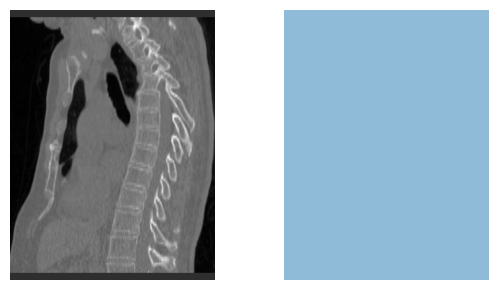

In [17]:
dls.show_batch(anatomical_plane=0, unique=True)

In [18]:
len(dls.train_ds.items), len(dls.valid_ds.items)

(36, 9)

In [19]:
from monai.networks.nets import UNet
from monai.losses import DiceCELoss

In [20]:
codes = np.unique(med_img_reader(train_df.label.tolist()[0]))
n_classes = len(codes)

In [21]:
codes, n_classes

(array([0., 1.], dtype=float32), 2)

In [22]:
model = UNet(dimensions=3, in_channels=1, out_channels=n_classes, 
             channels=(16, 32, 64, 128, 256),strides=(2, 2, 2, 2), 
             num_res_units=2)

C:\Users\Eirik\anaconda3\envs\raskmonai\lib\site-packages\monai\utils\deprecate_utils.py:219: FutureWarning: monai.networks.nets.unet UNet.__init__:dimensions: Argument `dimensions` has been deprecated since version 0.6. Please use `spatial_dims` instead.
  warn_deprecated(argname, msg, warning_category)


In [23]:
loss_func = CustomLoss(loss_func=DiceCELoss(to_onehot_y=True, include_background=True, softmax=True))

In [24]:
learn = Learner(dls, model, loss_func=loss_func, opt_func=ranger, metrics=multi_dice_score)

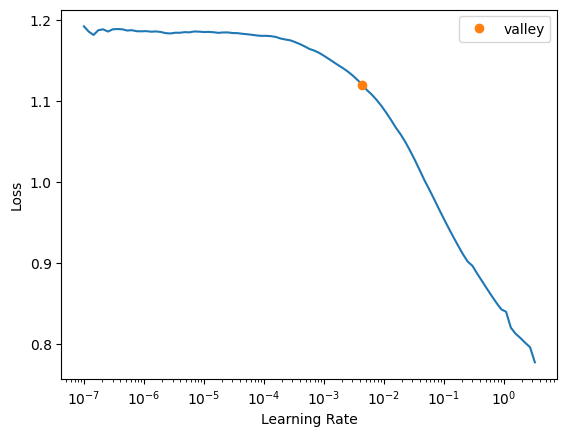

In [25]:
lr = learn.lr_find()#.to_fp16()

In [26]:
epochs = 4

In [27]:
learn.fit_flat_cos(epochs, lr)

epoch,train_loss,valid_loss,multi_dice_score,time
0,0.918861,0.778332,nan,08:01
1,0.744945,0.602492,nan,08:03
2,0.632077,0.540666,nan,08:05
3,0.572956,0.531883,nan,07:59


C:\Users\Eirik\anaconda3\envs\raskmonai\lib\site-packages\fastMONAI\vision_metrics.py:49: RuntimeWarning: Mean of empty slice
  binary_dice_scores.append(np.nanmean(dsc)) #TODO update torch to get torch.nanmean() to work


In [28]:
learn.save('baseline.lung-model')

Path('models/baseline.lung-model.pth')

C:\Users\Eirik\anaconda3\envs\raskmonai\lib\site-packages\fastMONAI\vision_metrics.py:49: RuntimeWarning: Mean of empty slice
  binary_dice_scores.append(np.nanmean(dsc)) #TODO update torch to get torch.nanmean() to work


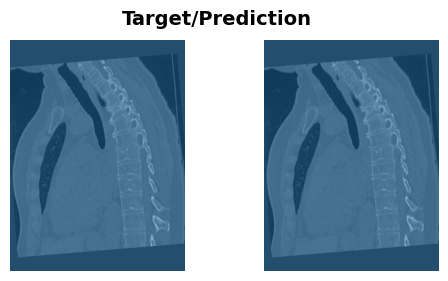

In [38]:
learn.show_results(anatomical_plane=0, ds_idx=-2)

In [30]:
test_dl = learn.dls.test_dl(test_df,with_labels=True)

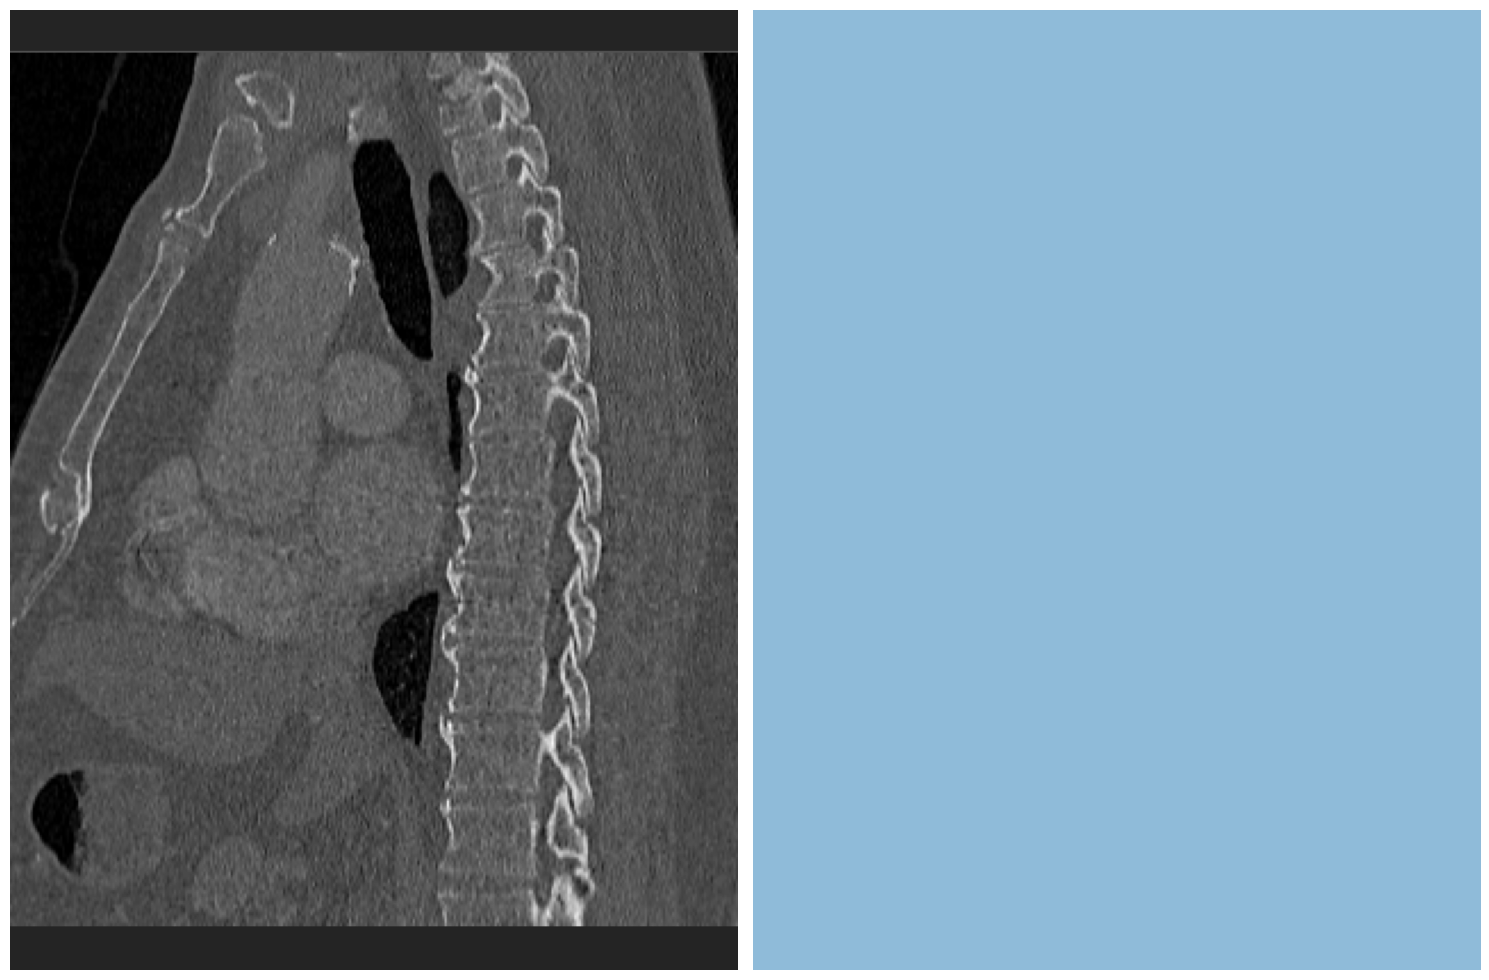

In [31]:
test_dl.show_batch(anatomical_plane=0, figsize=(15,15))

In [32]:
pred_acts, labels = learn.get_preds(dl=test_dl)
pred_acts.shape, labels.shape

(torch.Size([6, 2, 160, 320, 528]), torch.Size([6, 1, 160, 320, 528]))

In [39]:
multi_dice_score(pred_acts, labels)

tensor([0.])

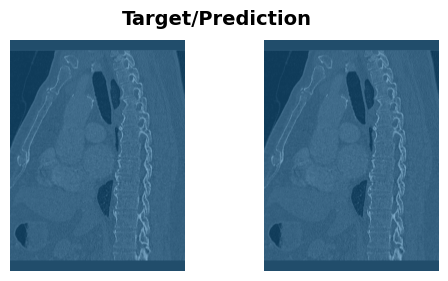

In [34]:
learn.show_results(anatomical_plane=0, dl=test_dl, ds_idx=19)

In [35]:
learn.export('baseline_lung_model.pkl')